In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx
# from node2vec import Node2Vec

df0 = pd.read_csv('train.csv',sep=',')
#df1 = pd.read_csv('test.csv',sep=',')

In [2]:
df = df0.sample(n=5000)

In [3]:
# Check for missing data
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             8
satisfaction                         0
dtype: int64

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
9801,9801,105601,Female,Loyal Customer,36,Business travel,Business,2493,2,2,...,5,5,5,5,4,5,3,74,70.0,satisfied
102263,102263,7255,Male,Loyal Customer,58,Personal Travel,Eco,130,1,0,...,1,4,4,5,3,5,1,0,0.0,neutral or dissatisfied
51288,51288,8643,Female,Loyal Customer,43,Business travel,Business,227,1,1,...,4,4,4,4,4,4,5,16,23.0,satisfied
59945,59945,106959,Male,Loyal Customer,53,Business travel,Business,937,2,2,...,4,4,4,4,3,4,3,3,10.0,satisfied
3959,3959,52270,Male,Loyal Customer,36,Business travel,Eco,509,4,5,...,4,4,3,4,3,3,4,0,2.0,neutral or dissatisfied


In [5]:
df.drop(columns=['Unnamed: 0','id'],inplace=True)

In [6]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
9801,Female,Loyal Customer,36,Business travel,Business,2493,2,2,2,2,...,5,5,5,5,4,5,3,74,70.0,satisfied
102263,Male,Loyal Customer,58,Personal Travel,Eco,130,1,0,1,2,...,1,4,4,5,3,5,1,0,0.0,neutral or dissatisfied
51288,Female,Loyal Customer,43,Business travel,Business,227,1,1,1,1,...,4,4,4,4,4,4,5,16,23.0,satisfied
59945,Male,Loyal Customer,53,Business travel,Business,937,2,2,2,2,...,4,4,4,4,3,4,3,3,10.0,satisfied
3959,Male,Loyal Customer,36,Business travel,Eco,509,4,5,5,5,...,4,4,3,4,3,3,4,0,2.0,neutral or dissatisfied


In [7]:
df.satisfaction.unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [8]:
df.Gender = df.Gender.apply(lambda x: 0 if x == 'Male' else 1)
df['Customer Type'] = df['Customer Type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)
df['Type of Travel'] = df['Type of Travel'].apply(lambda x: 0 if x == 'Personal Travel' else 1)
df['Class'] = df['Class'].apply(lambda x: 0 if x == 'Eco' else(1 if x == 'Eco Plus' else 2))
df['satisfaction'] = df['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)

In [9]:
df.reset_index(drop=True,inplace=True)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,36,1,2,2493,2,2,2,2,...,5,5,5,5,4,5,3,74,70.0,1
1,0,0,58,0,0,130,1,0,1,2,...,1,4,4,5,3,5,1,0,0.0,0
2,1,0,43,1,2,227,1,1,1,1,...,4,4,4,4,4,4,5,16,23.0,1
3,0,0,53,1,2,937,2,2,2,2,...,4,4,4,4,3,4,3,3,10.0,1
4,0,0,36,1,0,509,4,5,5,5,...,4,4,3,4,3,3,4,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,35,1,2,102,1,1,1,1,...,4,4,4,5,3,4,4,0,0.0,1
4996,0,0,30,0,0,612,3,1,3,2,...,5,3,1,2,1,3,5,0,9.0,0
4997,1,0,39,1,2,223,3,3,3,3,...,4,4,4,4,5,4,5,29,24.0,1
4998,1,0,30,0,0,612,2,1,2,2,...,1,1,4,2,1,2,1,4,9.0,0


In [10]:
df.drop(columns=['Arrival Delay in Minutes'],inplace = True)

In [11]:
# max number of graph generation features
np.log(len(df))

8.517193191416238

In [12]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,36,1,2,2493,2,2,2,2,...,4,5,5,5,5,4,5,3,74,1
1,0,0,58,0,0,130,1,0,1,2,...,1,1,4,4,5,3,5,1,0,0
2,1,0,43,1,2,227,1,1,1,1,...,5,4,4,4,4,4,4,5,16,1
3,0,0,53,1,2,937,2,2,2,2,...,4,4,4,4,4,3,4,3,3,1
4,0,0,36,1,0,509,4,5,5,5,...,4,4,4,3,4,3,3,4,0,0


In [13]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

Following variables are used for the graph generation:

- Gender
- Customer Type
- Age
- Type of Travel
- Class

In [14]:
df.Age.describe()

count    5000.000000
mean       39.395400
std        15.120489
min         7.000000
25%        27.000000
50%        40.000000
75%        51.000000
max        80.000000
Name: Age, dtype: float64

In [15]:
X = df

In [16]:
X.Age = X.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))

In [17]:
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,1,1,2,2493,2,2,2,2,...,4,5,5,5,5,4,5,3,74,1
1,0,0,3,0,0,130,1,0,1,2,...,1,1,4,4,5,3,5,1,0,0
2,1,0,2,1,2,227,1,1,1,1,...,5,4,4,4,4,4,4,5,16,1
3,0,0,3,1,2,937,2,2,2,2,...,4,4,4,4,4,3,4,3,3,1
4,0,0,1,1,0,509,4,5,5,5,...,4,4,4,3,4,3,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,1,1,2,102,1,1,1,1,...,5,4,4,4,5,3,4,4,0,1
4996,0,0,1,0,0,612,3,1,3,2,...,5,5,3,1,2,1,3,5,0,0
4997,1,0,2,1,2,223,3,3,3,3,...,4,4,4,4,4,5,4,5,29,1
4998,1,0,1,0,0,612,2,1,2,2,...,1,1,1,4,2,1,2,1,4,0


In [18]:
# gender
gend_alpha0 = 0.60
gend_beta1 = 0.40

aff_gend = np.array([[gend_alpha0,gend_beta1],
                     [gend_beta1,gend_alpha0]])

# customer type (loyal vs disoyal)

type_alpha0 = 0.8
type_beta1 = 0.5

aff_type = np.array([[type_alpha0, type_beta1],
                     [type_beta1, type_alpha0]])


# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta3,age_beta2,age_beta1,age_alpha0]])


# Type of travel
trav_type_alpha0 = 0.80
trav_type_beta1 = 0.40

aff_trav_type = np.array([[trav_type_alpha0, trav_type_beta1],
                          [trav_type_beta1, trav_type_alpha0]])

# Class

class_alpha0 = 0.85
class_beta1 = 0.60
class_beta2 = 0.40

aff_class = np.array([[class_alpha0, class_beta1, class_beta2],
                      [class_beta1, class_alpha0, class_beta1],
                      [class_beta2, class_beta1, class_alpha0]])


aff = {0:aff_gend, 1:aff_type, 2:aff_age, 3:aff_trav_type, 4:aff_class}


In [19]:
genvars = X[['Gender','Customer Type','Age','Type of Travel','Class']]

In [20]:
genvars

,Gender,Customer Type,Age,Type of Travel,Class
0,1,0,1,1,2
1,0,0,3,0,0
2,1,0,2,1,2
3,0,0,3,1,2
4,0,0,1,1,0
...,...,...,...,...,...
4995,1,0,1,1,2
4996,0,0,1,0,0
4997,1,0,2,1,2
4998,1,0,1,0,0


In [21]:
x = genvars.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v)

In [22]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0


In [23]:
A = A + A.T - np.diag(np.diag(A))

In [24]:
G = nx.from_numpy_matrix(A)

In [25]:
nx.is_connected(G)

True

In [26]:
#nx.draw(G,node_size=20)

In [27]:
features = pd.Series(df.satisfaction) # invested or inv_pref

In [28]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('red')
    else:
        color_map.append('blue')

In [29]:
#pos = nx.spring_layout(G)

In [30]:
#nx.draw(G,pos,labels=features,node_size=20,node_color=color_map,with_labels=False)
#plt.show()

In [45]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

G_dgl = dgl.from_networkx(G)
feat = df.drop(columns=['satisfaction'])
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.2)
G_dgl.ndata['label'] = torch.tensor(features)

In [46]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [47]:
# Contruct a two-layer GNN model
import dgl.nn as dglnn

class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats):
        super().__init__()
        self.conv1 = dglnn.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats, aggregator_type='mean')
        self.conv2 = dglnn.SAGEConv(
            in_feats=hid_feats, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
        return h

In [48]:
def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [49]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [50]:
model = SAGE(in_feats=n_features, hid_feats=100, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
for epoch in range(250):
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    if epoch % 10 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val))


Epoch: 0, train loss: 0.9024, validation loss: 0.9027, training accuracy: 0.4804, validation accuracy: 0.4931
Epoch: 10, train loss: 0.4682, validation loss: 0.4657, training accuracy: 0.7970, validation accuracy: 0.7935
Epoch: 20, train loss: 0.3704, validation loss: 0.3804, training accuracy: 0.8503, validation accuracy: 0.8412
Epoch: 30, train loss: 0.3410, validation loss: 0.3588, training accuracy: 0.8623, validation accuracy: 0.8474
Epoch: 40, train loss: 0.3232, validation loss: 0.3472, training accuracy: 0.8714, validation accuracy: 0.8564
Epoch: 50, train loss: 0.3076, validation loss: 0.3363, training accuracy: 0.8804, validation accuracy: 0.8599
Epoch: 60, train loss: 0.2936, validation loss: 0.3239, training accuracy: 0.8854, validation accuracy: 0.8654
Epoch: 70, train loss: 0.2812, validation loss: 0.3128, training accuracy: 0.8925, validation accuracy: 0.8732
Epoch: 80, train loss: 0.2698, validation loss: 0.3036, training accuracy: 0.8975, validation accuracy: 0.8789
Ep

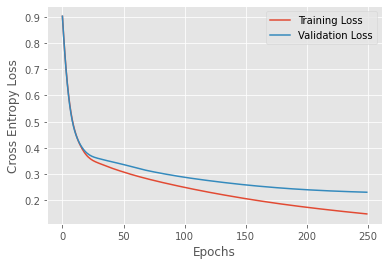

In [51]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

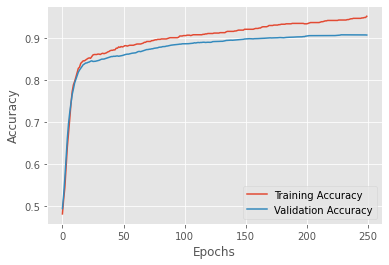

In [52]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


Classification Accuracy validation set 0.9078651685393259
-------------------------------------------------------------
Classification Accuracy training set 0.9527638190954774
-------------------------------------------------------------
Confusion Matrix validation set:
[[2161  117]
 [ 252 1475]]
-------------------------------------------------------------
Confusion Matrix training set:
[[553  19]
 [ 28 395]]


In [54]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

roc_auc_score(val_lab,indices_val)

0.9013606903321874

In [55]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(feat,f, test_size = 0.8, shuffle=True)

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=250, batch_size=5)

Epoch 1/250
200/200 [==============================] - 3s 10ms/step - loss: 0.7837 - accuracy: 0.4872 - val_loss: 0.5924 - val_accuracy: 0.7245
Epoch 2/250
200/200 [==============================] - 1s 7ms/step - loss: 0.5629 - accuracy: 0.7603 - val_loss: 0.4678 - val_accuracy: 0.8472
Epoch 3/250
200/200 [==============================] - 2s 9ms/step - loss: 0.4339 - accuracy: 0.8721 - val_loss: 0.3706 - val_accuracy: 0.8605
Epoch 4/250
200/200 [==============================] - 2s 8ms/step - loss: 0.3455 - accuracy: 0.8738 - val_loss: 0.3365 - val_accuracy: 0.8702
Epoch 5/250
200/200 [==============================] - 2s 8ms/step - loss: 0.3045 - accuracy: 0.8733 - val_loss: 0.3220 - val_accuracy: 0.8775
Epoch 6/250
200/200 [==============================] - 2s 10ms/step - loss: 0.2941 - accuracy: 0.8893 - val_loss: 0.3131 - val_accuracy: 0.8792
Epoch 7/250
200/200 [==============================] - 3s 13ms/step - loss: 0.2956 - accuracy: 0.8865 - val_loss: 0.3068 - val_accuracy: 0.8

Epoch 58/250
200/200 [==============================] - 2s 9ms/step - loss: 0.0421 - accuracy: 0.9884 - val_loss: 0.4019 - val_accuracy: 0.8910
Epoch 59/250
200/200 [==============================] - 2s 10ms/step - loss: 0.0533 - accuracy: 0.9862 - val_loss: 0.4070 - val_accuracy: 0.8880
Epoch 60/250
200/200 [==============================] - 2s 9ms/step - loss: 0.0438 - accuracy: 0.9881 - val_loss: 0.4119 - val_accuracy: 0.8890
Epoch 61/250
200/200 [==============================] - 2s 10ms/step - loss: 0.0425 - accuracy: 0.9928 - val_loss: 0.4158 - val_accuracy: 0.8885
Epoch 62/250
200/200 [==============================] - 3s 13ms/step - loss: 0.0346 - accuracy: 0.9926 - val_loss: 0.4273 - val_accuracy: 0.8867
Epoch 63/250
200/200 [==============================] - 2s 9ms/step - loss: 0.0341 - accuracy: 0.9931 - val_loss: 0.4343 - val_accuracy: 0.8895
Epoch 64/250
200/200 [==============================] - 3s 16ms/step - loss: 0.0358 - accuracy: 0.9912 - val_loss: 0.4419 - val_accur

200/200 [==============================] - 2s 10ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.8758 - val_accuracy: 0.8835
Epoch 115/250
200/200 [==============================] - 2s 9ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.8804 - val_accuracy: 0.8827
Epoch 116/250
200/200 [==============================] - 2s 10ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.8924 - val_accuracy: 0.8832
Epoch 117/250
200/200 [==============================] - 2s 10ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.9260 - val_accuracy: 0.8845
Epoch 118/250
200/200 [==============================] - 2s 9ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.9244 - val_accuracy: 0.8827
Epoch 119/250
200/200 [==============================] - 1s 7ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.9209 - val_accuracy: 0.8848
Epoch 120/250
200/200 [==============================] - 1s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.9382 - val_accuracy: 0.8

200/200 [==============================] - 1s 6ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.1694 - val_accuracy: 0.8857
Epoch 171/250
200/200 [==============================] - 1s 7ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.1609 - val_accuracy: 0.8863
Epoch 172/250
200/200 [==============================] - 2s 9ms/step - loss: 7.3208e-04 - accuracy: 1.0000 - val_loss: 1.1692 - val_accuracy: 0.8865
Epoch 173/250
200/200 [==============================] - 2s 11ms/step - loss: 7.9220e-04 - accuracy: 1.0000 - val_loss: 1.1822 - val_accuracy: 0.8855
Epoch 174/250
200/200 [==============================] - 2s 10ms/step - loss: 8.9471e-04 - accuracy: 1.0000 - val_loss: 1.1937 - val_accuracy: 0.8848
Epoch 175/250
200/200 [==============================] - 3s 13ms/step - loss: 4.6996e-04 - accuracy: 1.0000 - val_loss: 1.2018 - val_accuracy: 0.8857
Epoch 176/250
200/200 [==============================] - 2s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.2138 - 

200/200 [==============================] - 2s 9ms/step - loss: 5.7397e-04 - accuracy: 1.0000 - val_loss: 1.3688 - val_accuracy: 0.8840
Epoch 226/250
200/200 [==============================] - 2s 10ms/step - loss: 7.4172e-04 - accuracy: 1.0000 - val_loss: 1.3579 - val_accuracy: 0.8857
Epoch 227/250
200/200 [==============================] - 3s 14ms/step - loss: 4.3973e-04 - accuracy: 1.0000 - val_loss: 1.3769 - val_accuracy: 0.8863
Epoch 228/250
200/200 [==============================] - 2s 12ms/step - loss: 8.1267e-04 - accuracy: 1.0000 - val_loss: 1.3846 - val_accuracy: 0.8863
Epoch 229/250
200/200 [==============================] - 2s 10ms/step - loss: 3.3047e-04 - accuracy: 1.0000 - val_loss: 1.3915 - val_accuracy: 0.8865
Epoch 230/250
200/200 [==============================] - 3s 15ms/step - loss: 2.2157e-04 - accuracy: 1.0000 - val_loss: 1.4020 - val_accuracy: 0.8875
Epoch 231/250
200/200 [==============================] - 3s 13ms/step - loss: 1.8062e-04 - accuracy: 1.0000 - val_l

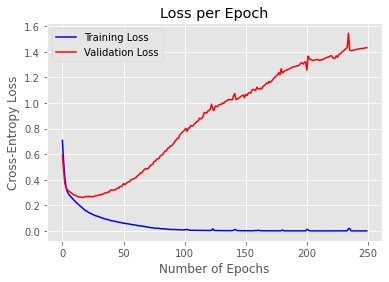

In [57]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

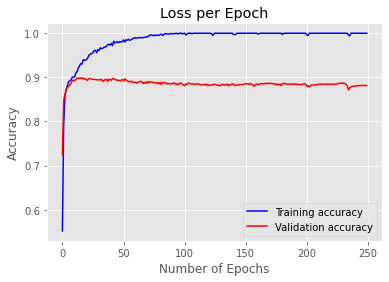

In [58]:
plt.plot(history.history['accuracy'],label = 'Training accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Loss per Epoch')
plt.legend()
plt.show()